In [52]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plot
import numpy as np


In [34]:
df = pd.read_csv(Path("test_logs/add_load_100rps_lazy.csv"), names=["times", "type", "thread"])
df.head()

,times,type,thread
0,1288,HTTP Request,Thread Group 1-208
1,1286,HTTP Request,Thread Group 1-221
2,1288,HTTP Request,Thread Group 1-165
3,1288,HTTP Request,Thread Group 1-249
4,1285,HTTP Request,Thread Group 1-325


# Read single tests csvs

In [35]:
add_load_100rps_fg = pd.read_csv(Path("test_logs/add_load_100rps_fine-grained.csv"), names=["time", "type", "thread"])
add_load_100rps_lazy = pd.read_csv(Path("test_logs/add_load_100rps_lazy.csv"), names=["time", "type", "thread"])
add_load_500rps_fg = pd.read_csv(Path("test_logs/add_load_500rps_fine-grained.csv"), names=["time", "type", "thread"])
add_load_500rps_lazy = pd.read_csv(Path("test_logs/add_load_500rps_lazy.csv"), names=["time", "type", "thread"])
contains_load_100rps_fg = pd.read_csv(Path("test_logs/contains_load_100rps_fine-grained.csv"), names=["time", "type", "thread"])
contains_load_100rps_lazy = pd.read_csv(Path("test_logs/contains_load_100rps_lazy.csv"), names=["time", "type", "thread"])
contains_load_500rps_fg = pd.read_csv(Path("test_logs/contains_load_500rps_fine-grained.csv"), names=["time", "type", "thread"])
contains_load_500rps_lazy = pd.read_csv(Path("test_logs/contains_load_500rps_lazy.csv"), names=["time", "type", "thread"])
remove_load_100rps_fg = pd.read_csv(Path("test_logs/remove_load_100rps_fine-grained.csv"), names=["time", "type", "thread"])
remove_load_100rps_lazy = pd.read_csv(Path("test_logs/remove_load_100rps_lazy.csv"), names=["time", "type", "thread"])
remove_load_500rps_fg = pd.read_csv(Path("test_logs/remove_load_500rps_fine-grained.csv"), names=["time", "type", "thread"])
remove_load_500rps_lazy = pd.read_csv(Path("test_logs/remove_load_500rps_lazy.csv"), names=["time", "type", "thread"])

labels = [
    "add_load_100rps_fg",
    "add_load_100rps_lazy",
    "add_load_500rps_fg",
    "add_load_500rps_lazy",
    "contains_load_100rps_fg",
    "contains_load_100rps_lazy",
    "contains_load_500rps_fg",
    "contains_load_500rps_lazy",
    "remove_load_100rps_fg",
    "remove_load_100rps_lazy",
    "remove_load_500rps_fg",
    "remove_load_500rps_lazy",
]

data = [
    add_load_100rps_fg["time"],
    add_load_100rps_lazy["time"],
    add_load_500rps_fg["time"],
    add_load_500rps_lazy["time"],
    contains_load_100rps_fg["time"],
    contains_load_100rps_lazy["time"],
    contains_load_500rps_fg["time"],
    contains_load_500rps_lazy["time"],
    remove_load_100rps_fg["time"],
    remove_load_100rps_lazy["time"],
    remove_load_500rps_fg["time"],
    remove_load_500rps_lazy["time"],
]

# Display tests

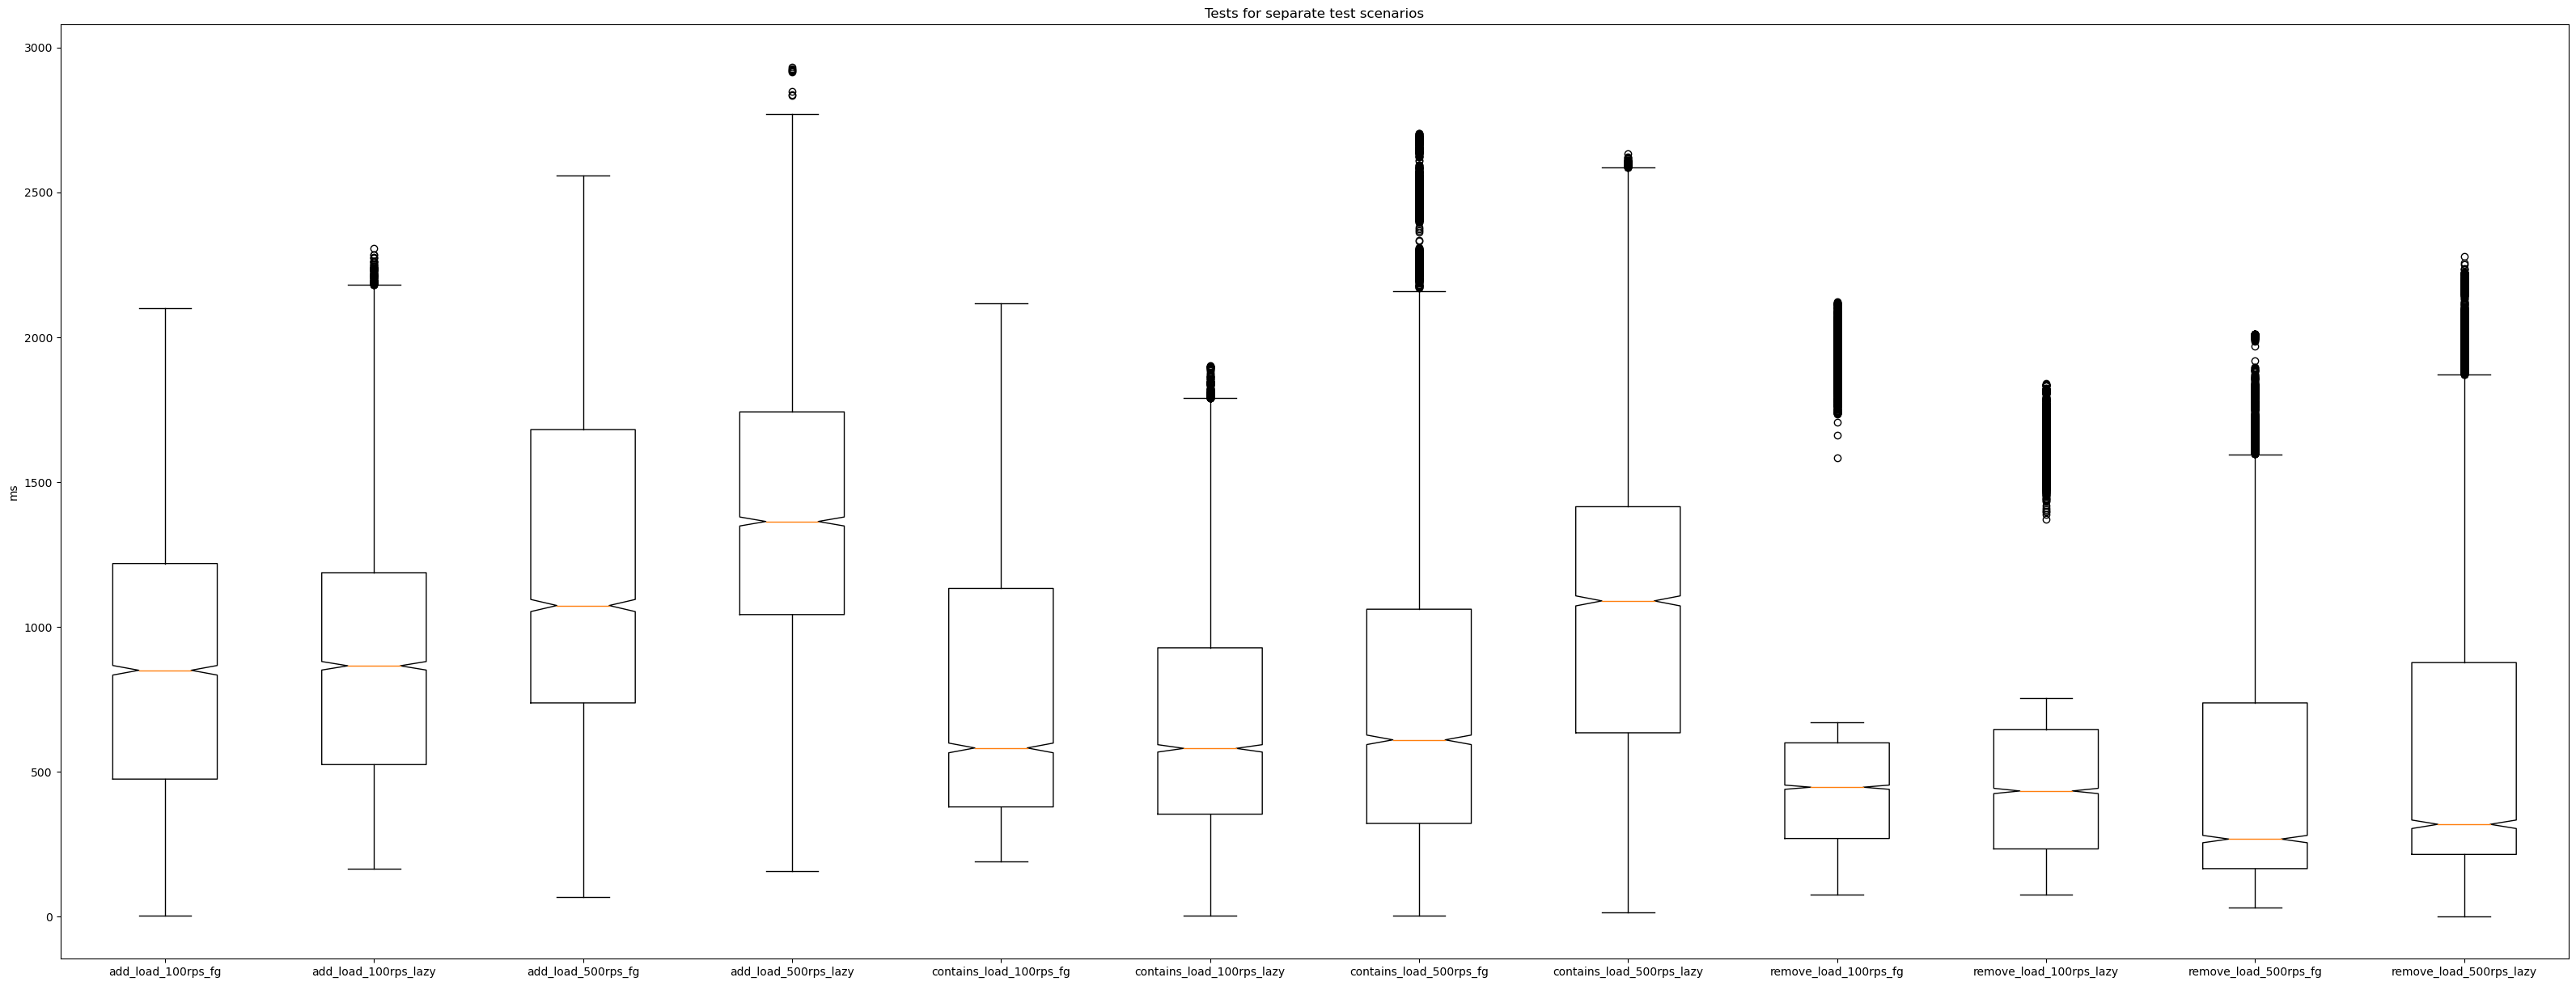

In [36]:
_fig = plot.figure(figsize=(40, 15))

# Making a plot
plot.boxplot(data, labels=labels, notch=True)
plot.title("Tests for separate test scenarios")
plot.ylabel("ms")

# display the plot
plot.show()

# Read load tests csvs

In [37]:
load_test_fg = pd.read_csv(Path("test_logs/load_test_4000_users_10_requests_fine-grained.csv"), names=["time", "type", "thread"])
load_test_lazy = pd.read_csv(Path("test_logs/load_test_4000_users_10_requests_lazy.csv"), names=["time", "type", "thread"])

# Display load tests

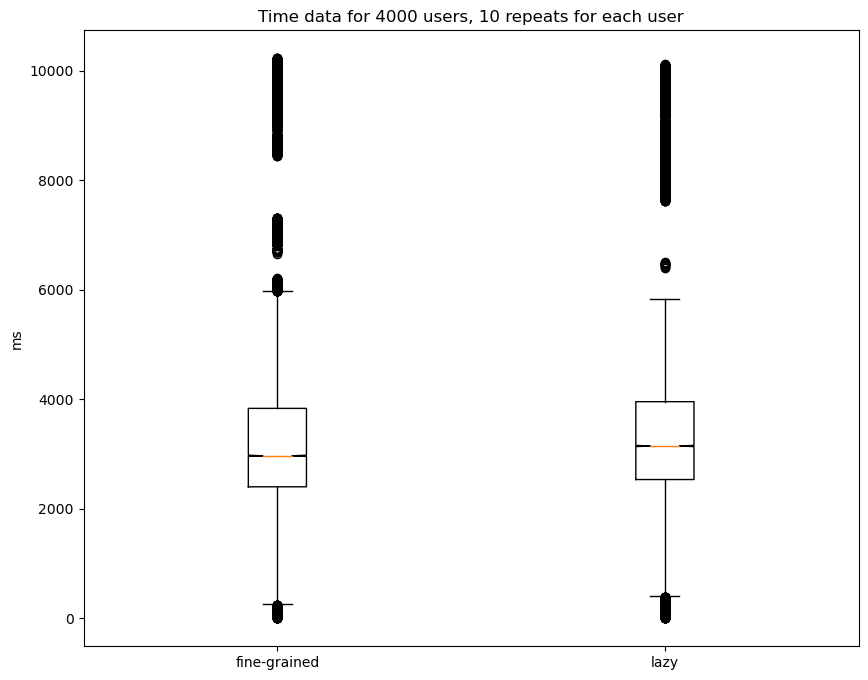

In [38]:
_fig = plot.figure(figsize=(10, 8))

# Making a plot
plot.boxplot(
    [load_test_fg["time"], load_test_lazy["time"]],
    labels=["fine-grained", "lazy"],
    notch=True,
)

plot.title("Time data for 4000 users, 10 repeats for each user")
plot.ylabel("ms")

# display the plot
plot.show()

# Fail point

```
emax@Maxs-MacBook-Air-2 test_infra % curl http://localhost:8080/lazy/count 
9212%
```

In [57]:
fail_test_lazy = pd.read_csv(Path("test_logs/fail_lazy.csv"))
fail_test_fg = pd.read_csv(Path("test_logs/fail_fine-grained.csv"))

In [59]:
fail_test_lazy.head()

,elapsed,label,threadName
0,1909,Contains record request,Thread Group 1-4
1,1936,Contains record request,Thread Group 1-3
2,1933,Contains record request,Thread Group 1-6
3,1901,Contains record request,Thread Group 1-18
4,1954,Contains record request,Thread Group 1-1


In [58]:
fail_test_fg.head()

,elapsed,label,threadName
0,2556,Contains record request,Thread Group 1-13
1,2602,Contains record request,Thread Group 1-11
2,2657,Contains record request,Thread Group 1-4
3,2615,Contains record request,Thread Group 1-19
4,2602,Contains record request,Thread Group 1-22


Text(0, 0.5, 'ms')

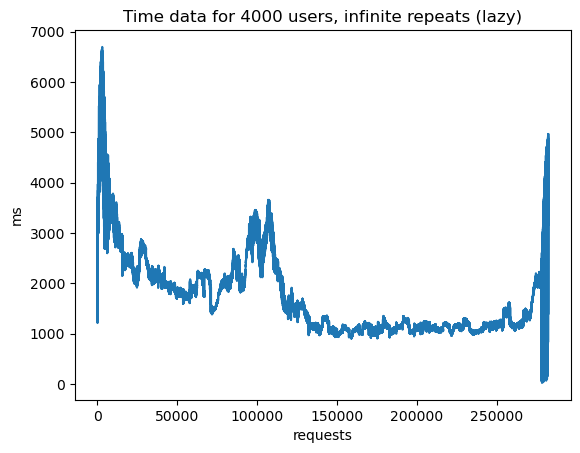

In [64]:
plot.plot(fail_test_lazy["elapsed"])

plot.title("Time data for 4000 users, infinite repeats (lazy)")
plot.xlabel("requests")
plot.ylabel("ms")

Text(0, 0.5, 'ms')

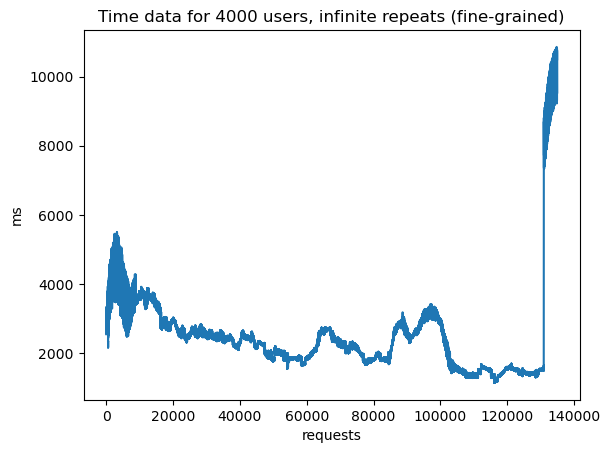

In [63]:
plot.plot(fail_test_fg["elapsed"])

plot.title("Time data for 4000 users, infinite repeats (fine-grained)")
plot.xlabel("requests")
plot.ylabel("ms")